# 👩🏻‍💻🏠 👨🏻‍💻🏢 Comparison of WFH vs WFO Among Working Adults

## 🎛️ Preliminaries

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Data Science
import numpy as np
import pandas as pd
import scipy.stats as stats

# Others
import os

In [4]:
# Load data
base_dir = os.path.dirname(os.getcwd())
file_path = os.path.join(base_dir, "data", "productivity_working_adults_wfh_wfo.csv")

if os.path.exists(file_path):
    print("Found data file in local directory.")
    productivity_working_adults_df = pd.read_csv(file_path)

else:
    raise FileNotFoundError(f"File not found at: {file_path}")

Found data file in local directory.


In [5]:
productivity_working_adults_df.head()

,Timestamp,Gender,Age Group,Highest Education Level,Marital Status,Industry,Current Work Location,Employment Status,Current Work Arrangement,Years of Work Experience,...,I feel mentally well and emotionally balanced most days under my current work arrangement..1,I often feel emotionally drained as a result of my work..1,I am satisfied with my work-life balance under my current work arrangement..1,I feel mentally well and emotionally balanced most days when working from home.,I feel mentally well and emotionally balanced most days when working from office.,I often feel emotionally drained after working from home.,I often feel emotionally drained after working from office.,I am satisfied with my work-life balance when working from home.,I am satisfied with my work-life balance when working from office.,"Overall, I am satisfied with my current job..1"
0,6/2/2025 18:38:47,Male,25-34,Bachelor's Degree,Single,Finance & Banking,"Klang Valley (Kuala Lumpur, Selangor, Putrajaya)",Full-time,Hybrid (mix of WFH and WFO),1–3 years,...,4.0,2.0,4.0,5.0,2.0,5.0,2.0,5.0,2.0,4.0
1,6/2/2025 18:38:59,Female,25-34,Bachelor's Degree,Single,Finance & Banking,"Klang Valley (Kuala Lumpur, Selangor, Putrajaya)",Full-time,Work From Office (WFO),1–3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6/2/2025 19:30:21,Female,25-34,Bachelor's Degree,Single,Media & Communications,"Rest of Peninsular Malaysia (e.g. Penang, Joho...",Full-time,Work From Home (WFH),1–3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6/2/2025 21:37:18,Male,25-34,Bachelor's Degree,Single,Information Technology (IT),"Klang Valley (Kuala Lumpur, Selangor, Putrajaya)",Full-time,Work From Home (WFH),1–3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/2/2025 21:48:31,Female,18-24,Bachelor's Degree,Single,Information Technology (IT),"Klang Valley (Kuala Lumpur, Selangor, Putrajaya)",Full-time,Hybrid (mix of WFH and WFO),1–3 years,...,3.0,3.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0


In [6]:
# View all columns in full display
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

productivity_working_adults_df.head()

,Timestamp,Gender,Age Group,Highest Education Level,Marital Status,Industry,Current Work Location,Employment Status,Current Work Arrangement,Years of Work Experience,Years in Current Work Arrangement,Average Weekly Working Hours,I feel more productive under my current work arrangement.,I complete my work tasks on time under my current work arrangement.,I find it easier to concentrate and avoid distractions in my current work setting.,I feel more productive under my current work arrangement..1,I complete my work tasks on time under my current work arrangement..1,I find it easier to concentrate and avoid distractions in my current work setting..1,I feel more productive when working from home.,I feel more productive when working from office.,I complete my work tasks on time when working from home.,I complete my work tasks on time when working from office.,I find it easier to concentrate and avoid distractions when working from home.,I find it easier to concentrate and avoid distractions when working from office.,I feel mentally well and emotionally balanced most days under my current work arrangement.,I often feel emotionally drained as a result of my work.,I am satisfied with my work-life balance under my current work arrangement.,"Overall, I am satisfied with my current job.",I feel mentally well and emotionally balanced most days under my current work arrangement..1,I often feel emotionally drained as a result of my work..1,I am satisfied with my work-life balance under my current work arrangement..1,I feel mentally well and emotionally balanced most days when working from home.,I feel mentally well and emotionally balanced most days when working from office.,I often feel emotionally drained after working from home.,I often feel emotionally drained after working from office.,I am satisfied with my work-life balance when working from home.,I am satisfied with my work-life balance when working from office.,"Overall, I am satisfied with my current job..1"
0,6/2/2025 18:38:47,Male,25-34,Bachelor's Degree,Single,Finance & Banking,"Klang Valley (Kuala Lumpur, Selangor, Putrajaya)",Full-time,Hybrid (mix of WFH and WFO),1–3 years,Less than 1 year,30-40 hours,NaN,NaN,NaN,4.0,4.0,4.0,5.0,2.0,5.0,2.0,5.0,2.0,NaN,NaN,NaN,NaN,4.0,2.0,4.0,5.0,2.0,5.0,2.0,5.0,2.0,4.0
1,6/2/2025 18:38:59,Female,25-34,Bachelor's Degree,Single,Finance & Banking,"Klang Valley (Kuala Lumpur, Selangor, Putrajaya)",Full-time,Work From Office (WFO),1–3 years,1-3 years,More than 50 hours,3.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6/2/2025 19:30:21,Female,25-34,Bachelor's Degree,Single,Media & Communications,"Rest of Peninsular Malaysia (e.g. Penang, Johor, Pahang)",Full-time,Work From Home (WFH),1–3 years,Less than 1 year,30-40 hours,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6/2/2025 21:37:18,Male,25-34,Bachelor's Degree,Single,Information Technology (IT),"Klang Valley (Kuala Lumpur, Selangor, Putrajaya)",Full-time,Work From Home (WFH),1–3 years,1-3 years,30-40 hours,3.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/2/2025 21:48:31,Female,18-24,Bachelor's Degree,Single,Information Technology (IT),"Klang Valley (Kuala Lumpur, Selangor, Putrajaya)",Full-time,Hybrid (mix of WFH and WFO),1–3 years,1-3 years,30-40 hours,NaN,NaN,NaN,4.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,3.0,3.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0


## 🛠️ Data Preprocessing

In [7]:
productivity_working_adults_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 38 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Timestamp                                                                                     144 non-null    object 
 1   Gender                                                                                        144 non-null    object 
 2   Age Group                                                                                     144 non-null    object 
 3   Highest Education Level                                                                       144 non-null    object 
 4   Marital Status                                                                                144 non-null    object 
 5   Industry                     

In [8]:
# Column renaming
cleaned_productivity_working_adults_df = productivity_working_adults_df.copy()

# 'Current Work Location' column
cleaned_productivity_working_adults_df['Current Work Location'] = productivity_working_adults_df['Current Work Location'].replace({
    'Klang Valley (Kuala Lumpur, Selangor, Putrajaya)': 'Klang Valley',
    'Rest of Peninsular Malaysia (e.g. Penang, Johor, Pahang)': 'Penang, Johor, Penang'
})

# 'Current Work Arrangement' column
cleaned_productivity_working_adults_df['Current Work Arrangement'] = productivity_working_adults_df['Current Work Arrangement'].replace({
    'Hybrid (mix of WFH and WFO)': 'Hybrid',
    'Work From Office (WFO)': 'WFO',
    'Work From Home (WFH)': 'WFH'
})

# 'Years of Work Experience' column
cleaned_productivity_working_adults_df['Years of Work Experience'] = productivity_working_adults_df['Years of Work Experience'].replace({
    'Less than 1 year': '< 1 year',
    'More than 10 years': '> 10 years'
})

# Drop 'Timestamp' column
cleaned_productivity_working_adults_df.drop(columns=['Timestamp'], inplace=True)

In [9]:
pd.set_option('display.max_columns', None)
cleaned_productivity_working_adults_df.head()

,Gender,Age Group,Highest Education Level,Marital Status,Industry,Current Work Location,Employment Status,Current Work Arrangement,Years of Work Experience,Years in Current Work Arrangement,Average Weekly Working Hours,I feel more productive under my current work arrangement.,I complete my work tasks on time under my current work arrangement.,I find it easier to concentrate and avoid distractions in my current work setting.,I feel more productive under my current work arrangement..1,I complete my work tasks on time under my current work arrangement..1,I find it easier to concentrate and avoid distractions in my current work setting..1,I feel more productive when working from home.,I feel more productive when working from office.,I complete my work tasks on time when working from home.,I complete my work tasks on time when working from office.,I find it easier to concentrate and avoid distractions when working from home.,I find it easier to concentrate and avoid distractions when working from office.,I feel mentally well and emotionally balanced most days under my current work arrangement.,I often feel emotionally drained as a result of my work.,I am satisfied with my work-life balance under my current work arrangement.,"Overall, I am satisfied with my current job.",I feel mentally well and emotionally balanced most days under my current work arrangement..1,I often feel emotionally drained as a result of my work..1,I am satisfied with my work-life balance under my current work arrangement..1,I feel mentally well and emotionally balanced most days when working from home.,I feel mentally well and emotionally balanced most days when working from office.,I often feel emotionally drained after working from home.,I often feel emotionally drained after working from office.,I am satisfied with my work-life balance when working from home.,I am satisfied with my work-life balance when working from office.,"Overall, I am satisfied with my current job..1"
0,Male,25-34,Bachelor's Degree,Single,Finance & Banking,Klang Valley,Full-time,Hybrid,1–3 years,Less than 1 year,30-40 hours,NaN,NaN,NaN,4.0,4.0,4.0,5.0,2.0,5.0,2.0,5.0,2.0,NaN,NaN,NaN,NaN,4.0,2.0,4.0,5.0,2.0,5.0,2.0,5.0,2.0,4.0
1,Female,25-34,Bachelor's Degree,Single,Finance & Banking,Klang Valley,Full-time,WFO,1–3 years,1-3 years,More than 50 hours,3.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Female,25-34,Bachelor's Degree,Single,Media & Communications,"Penang, Johor, Penang",Full-time,WFH,1–3 years,Less than 1 year,30-40 hours,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,25-34,Bachelor's Degree,Single,Information Technology (IT),Klang Valley,Full-time,WFH,1–3 years,1-3 years,30-40 hours,3.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,18-24,Bachelor's Degree,Single,Information Technology (IT),Klang Valley,Full-time,Hybrid,1–3 years,1-3 years,30-40 hours,NaN,NaN,NaN,4.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,3.0,3.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0


Split the cleaned dataset into two parts:

1. WFH & WFO

2. Hybrid

In [10]:
# Merge and reorder the likert questions columns

cleaned_productivity_working_adults_reordered_df = cleaned_productivity_working_adults_df.copy()

# === Merge Hybrid-specific `.1` columns into the main columns ===
hybrid_mask = cleaned_productivity_working_adults_reordered_df['Current Work Arrangement'] == 'Hybrid'

# Merge productivity-related responses
cleaned_productivity_working_adults_reordered_df.loc[hybrid_mask, 'I feel more productive under my current work arrangement.'] = \
  cleaned_productivity_working_adults_reordered_df.loc[hybrid_mask, 'I feel more productive under my current work arrangement..1']

cleaned_productivity_working_adults_reordered_df.loc[hybrid_mask, 'I complete my work tasks on time under my current work arrangement.'] = \
  cleaned_productivity_working_adults_reordered_df.loc[hybrid_mask, 'I complete my work tasks on time under my current work arrangement..1']

cleaned_productivity_working_adults_reordered_df.loc[hybrid_mask, 'I find it easier to concentrate and avoid distractions in my current work setting.'] = \
  cleaned_productivity_working_adults_reordered_df.loc[hybrid_mask, 'I find it easier to concentrate and avoid distractions in my current work setting..1']

# Merge wellness-related responses
cleaned_productivity_working_adults_reordered_df.loc[hybrid_mask, 'I feel mentally well and emotionally balanced most days under my current work arrangement.'] = \
  cleaned_productivity_working_adults_reordered_df.loc[hybrid_mask, 'I feel mentally well and emotionally balanced most days under my current work arrangement..1']

cleaned_productivity_working_adults_reordered_df.loc[hybrid_mask, 'I often feel emotionally drained as a result of my work.'] = \
  cleaned_productivity_working_adults_reordered_df.loc[hybrid_mask, 'I often feel emotionally drained as a result of my work..1']

cleaned_productivity_working_adults_reordered_df.loc[hybrid_mask, 'I am satisfied with my work-life balance under my current work arrangement.'] = \
  cleaned_productivity_working_adults_reordered_df.loc[hybrid_mask, 'I am satisfied with my work-life balance under my current work arrangement..1']

cleaned_productivity_working_adults_reordered_df.loc[hybrid_mask, 'Overall, I am satisfied with my current job.'] = \
  cleaned_productivity_working_adults_reordered_df.loc[hybrid_mask, 'Overall, I am satisfied with my current job..1']

# === Drop the `.1` columns ===
cleaned_productivity_working_adults_reordered_df.drop(columns=[
    'I feel more productive under my current work arrangement..1',
    'I complete my work tasks on time under my current work arrangement..1',
    'I find it easier to concentrate and avoid distractions in my current work setting..1',
    'I feel mentally well and emotionally balanced most days under my current work arrangement..1',
    'I often feel emotionally drained as a result of my work..1',
    'I am satisfied with my work-life balance under my current work arrangement..1',
    'Overall, I am satisfied with my current job..1'
], inplace=True)

# === Move WFH/WFO specific columns to the end ===
columns_to_move = [
    'I feel more productive when working from home.',
    'I feel more productive when working from office.',
    'I complete my work tasks on time when working from home.',
    'I complete my work tasks on time when working from office.',
    'I find it easier to concentrate and avoid distractions when working from home.',
    'I find it easier to concentrate and avoid distractions when working from office.',
    'I feel mentally well and emotionally balanced most days when working from home.',
    'I feel mentally well and emotionally balanced most days when working from office.',
    'I often feel emotionally drained after working from home.',
    'I often feel emotionally drained after working from office.',
    'I am satisfied with my work-life balance when working from home.',
    'I am satisfied with my work-life balance when working from office.',
]

# Reoder columns
cleaned_productivity_working_adults_reordered_df[[col for col in cleaned_productivity_working_adults_reordered_df.columns if col not in columns_to_move] + columns_to_move]

,Gender,Age Group,Highest Education Level,Marital Status,Industry,Current Work Location,Employment Status,Current Work Arrangement,Years of Work Experience,Years in Current Work Arrangement,Average Weekly Working Hours,I feel more productive under my current work arrangement.,I complete my work tasks on time under my current work arrangement.,I find it easier to concentrate and avoid distractions in my current work setting.,I feel mentally well and emotionally balanced most days under my current work arrangement.,I often feel emotionally drained as a result of my work.,I am satisfied with my work-life balance under my current work arrangement.,"Overall, I am satisfied with my current job.",I feel more productive when working from home.,I feel more productive when working from office.,I complete my work tasks on time when working from home.,I complete my work tasks on time when working from office.,I find it easier to concentrate and avoid distractions when working from home.,I find it easier to concentrate and avoid distractions when working from office.,I feel mentally well and emotionally balanced most days when working from home.,I feel mentally well and emotionally balanced most days when working from office.,I often feel emotionally drained after working from home.,I often feel emotionally drained after working from office.,I am satisfied with my work-life balance when working from home.,I am satisfied with my work-life balance when working from office.
0,Male,25-34,Bachelor's Degree,Single,Finance & Banking,Klang Valley,Full-time,Hybrid,1–3 years,Less than 1 year,30-40 hours,4.0,4.0,4.0,4.0,2.0,4.0,4.0,5.0,2.0,5.0,2.0,5.0,2.0,5.0,2.0,5.0,2.0,5.0,2.0
1,Female,25-34,Bachelor's Degree,Single,Finance & Banking,Klang Valley,Full-time,WFO,1–3 years,1-3 years,More than 50 hours,3.0,5.0,4.0,1.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Female,25-34,Bachelor's Degree,Single,Media & Communications,"Penang, Johor, Penang",Full-time,WFH,1–3 years,Less than 1 year,30-40 hours,5.0,5.0,5.0,5.0,3.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,25-34,Bachelor's Degree,Single,Information Technology (IT),Klang Valley,Full-time,WFH,1–3 years,1-3 years,30-40 hours,3.0,4.0,5.0,4.0,2.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,18-24,Bachelor's Degree,Single,Information Technology (IT),Klang Valley,Full-time,Hybrid,1–3 years,1-3 years,30-40 hours,4.0,5.0,3.0,3.0,3.0,4.0,4.0,2.0,5.0,4.0,4.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Female,18-24,Bachelor's Degree,Single,Retail,Klang Valley,Full-time,WFO,< 1 year,Less than 1 year,30-40 hours,3.0,4.0,4.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,Female,25-34,Bachelor's Degree,Single,Information Technology (IT),WFH,Freelance,WFH,4–6 years,1-3 years,41-50 hours,2.0,4.0,1.0,2.0,5.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,Female,25-34,Bachelor's Degree,Single,Finance & Banking,Klang Valley,Full-time,WFO,1–3 years,1-3 years,41-50 hours,1.0,1.0,4.0,1.0,5.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,Female,25-34,Bachelor's Degree,Single,Finance & Banking,Klang Valley,Full-time,WFO,1–3 years,1-3 years,41-50 hours,2.0,2.0,4.0,2.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
cleaned_productivity_working_adults_reordered_df.head(100)

,Gender,Age Group,Highest Education Level,Marital Status,Industry,Current Work Location,Employment Status,Current Work Arrangement,Years of Work Experience,Years in Current Work Arrangement,Average Weekly Working Hours,I feel more productive under my current work arrangement.,I complete my work tasks on time under my current work arrangement.,I find it easier to concentrate and avoid distractions in my current work setting.,I feel more productive when working from home.,I feel more productive when working from office.,I complete my work tasks on time when working from home.,I complete my work tasks on time when working from office.,I find it easier to concentrate and avoid distractions when working from home.,I find it easier to concentrate and avoid distractions when working from office.,I feel mentally well and emotionally balanced most days under my current work arrangement.,I often feel emotionally drained as a result of my work.,I am satisfied with my work-life balance under my current work arrangement.,"Overall, I am satisfied with my current job.",I feel mentally well and emotionally balanced most days when working from home.,I feel mentally well and emotionally balanced most days when working from office.,I often feel emotionally drained after working from home.,I often feel emotionally drained after working from office.,I am satisfied with my work-life balance when working from home.,I am satisfied with my work-life balance when working from office.
0,Male,25-34,Bachelor's Degree,Single,Finance & Banking,Klang Valley,Full-time,Hybrid,1–3 years,Less than 1 year,30-40 hours,4.0,4.0,4.0,5.0,2.0,5.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,5.0,2.0,5.0,2.0
1,Female,25-34,Bachelor's Degree,Single,Finance & Banking,Klang Valley,Full-time,WFO,1–3 years,1-3 years,More than 50 hours,3.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Female,25-34,Bachelor's Degree,Single,Media & Communications,"Penang, Johor, Penang",Full-time,WFH,1–3 years,Less than 1 year,30-40 hours,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,25-34,Bachelor's Degree,Single,Information Technology (IT),Klang Valley,Full-time,WFH,1–3 years,1-3 years,30-40 hours,3.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,18-24,Bachelor's Degree,Single,Information Technology (IT),Klang Valley,Full-time,Hybrid,1–3 years,1-3 years,30-40 hours,4.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,25-34,Bachelor's Degree,Single,Transportation & Logistics,Klang Valley,Full-time,WFO,4–6 years,1-3 years,30-40 hours,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
96,Male,25-34,Bachelor's Degree,Married,Manufacturing,Klang Valley,Full-time,WFO,4–6 years,4-6 years,30-40 hours,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
97,Male,25-34,Bachelor's Degree,Single,Government & Public Sector,Klang Valley,Full-time,WFO,4–6 years,1-3 years,41-50 hours,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
98,Male,25-34,Bachelor's Degree,Single,Manufacturing,"Penang, Johor, Penang",Full-time,WFO,1–3 years,1-3 years,41-50 hours,3.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


## 📊 Exploratory Data Analysis (EDA)

### Demographic distributions

In [12]:
# Respondent Demographic distributions

demographic_vars = [
    'Gender', 'Age Group', 'Highest Education Level',
    'Marital Status', 'Industry', 'Current Work Arrangement'
]

for demo_var in demographic_vars:
  df_counts = (
      cleaned_productivity_working_adults_reordered_df[demo_var]
      .value_counts()
      .reset_index()
  )
  df_counts.columns = ['Category', 'Count']

  fig = px.bar(
      df_counts,
      x='Category',
      y='Count',
      title=f'Distribution of {demo_var}',
      color='Category',
      color_discrete_sequence=px.colors.qualitative.Set3
  )

  fig.update_layout(
      xaxis_title=demo_var,
      yaxis_title='Count',
      xaxis_tickangle=-30,
      title_x=0.5
  )
  fig.show()

### Productivity & Wellness scores by Work Arrangement

In [13]:
# Productivity & Wellness scores by Work Arrangement

score_vars = {
    'I feel more productive under my current work arrangement.': 'Perceived Productivity',
    'I am satisfied with my work-life balance under my current work arrangement.': 'Work-life Balance',
    'I often feel emotionally drained as a result of my work.': 'Emotional Exhaustion'
}

for full_label, short_label in score_vars.items():
  fig = px.box(
      cleaned_productivity_working_adults_reordered_df,
      x='Current Work Arrangement',
      y=full_label,
      points='all',
      color='Current Work Arrangement',
      color_discrete_sequence=px.colors.qualitative.Set2,
      title=f'{short_label} by Work Arrangement'
  )

  fig.update_layout(
      xaxis_title='Current Work Arrangement',
      yaxis_title=short_label,
      title_x=0.5
  )

  fig.show()

#### 🔍 Productivity & Wellness EDA Interpretation

##### **1. Perceived Productivity by Work Arrangement**

- **Boxplot Observation:**

  - **Hybrid** workers has the highest median (close to 5) and tight IQR -> high, consistent productivity.

  - **WFO** workers shows a much wider spread, lower median (around 3), and more outliers -> inconsistent productivity.

  - **WFH** workers is moderately high and consistent.

✅ **Interpretation:**
Employee in hybrid arrangements feel most productive, likely due to flexibility and autonomy. WFO workers vary widely, suggesting that the traditional office setting may not support consistent productivity for all individuals.

##### **2. Work-life Balance by Work Arrangement**

- **Boxplot Observation:**

  - **Hybrid** again has the highest scores with little variability.

  - **WFO** has the lowest median and widest spread.

  - **WFH** falls between the two.

✅ **Interpretation:**
Hybrid work setting is clearly the most favorable for maintaining work-life balance, supporting the idea that structured flexibility improves personal well-being. On the other hand, WFO work setting may struggle more with time constraints and separation between work and life domains.

##### **3. Emotional Exhaustion by Work Arrangement**

- **Boxplot Observation:**

  - **WFO** shows the highest exhaustion, with a median near 4 and some extreme outliers.

  - **Hybrid** and **WFH** show lower and more stable exhaustion levels.

✅ **Interpretation:**
Employees in WFO arrangements experiences the most emotional strain, which aligns with higher physical demands (e.g., commuting, rigid hours). WFH and Hybrid arrangements seem to mitigate emotional fatigue, potentially improving mental wellness.

### Correlation Matrix for Likert Scale questions

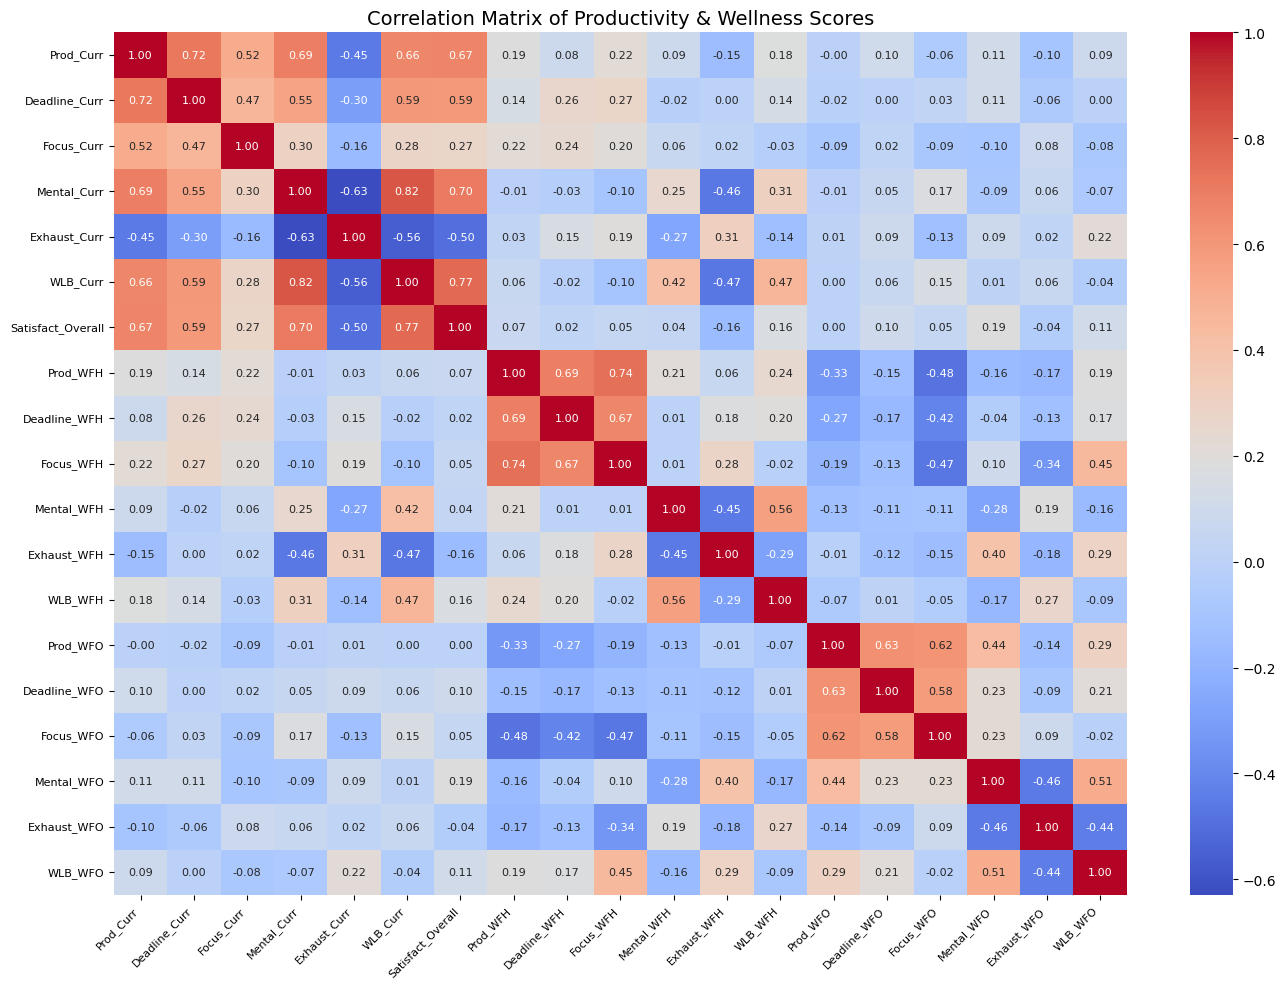

In [14]:
rename_map = {
    # Productivity (Current)
    'I feel more productive under my current work arrangement.': 'Prod_Curr',
    'I complete my work tasks on time under my current work arrangement.': 'Deadline_Curr',
    'I find it easier to concentrate and avoid distractions in my current work setting.': 'Focus_Curr',

    # Wellness (Current)
    'I feel mentally well and emotionally balanced most days under my current work arrangement.': 'Mental_Curr',
    'I often feel emotionally drained as a result of my work.': 'Exhaust_Curr',
    'I am satisfied with my work-life balance under my current work arrangement.': 'WLB_Curr',
    'Overall, I am satisfied with my current job.': 'Satisfact_Overall',

    # Productivity (WFH)
    'I feel more productive when working from home.': 'Prod_WFH',
    'I complete my work tasks on time when working from home.': 'Deadline_WFH',
    'I find it easier to concentrate and avoid distractions when working from home.': 'Focus_WFH',

    # Wellness (WFH)
    'I feel mentally well and emotionally balanced most days when working from home.': 'Mental_WFH',
    'I often feel emotionally drained after working from home.': 'Exhaust_WFH',
    'I am satisfied with my work-life balance when working from home.': 'WLB_WFH',

    # Productivity (WFO)
    'I feel more productive when working from office.': 'Prod_WFO',
    'I complete my work tasks on time when working from office.': 'Deadline_WFO',
    'I find it easier to concentrate and avoid distractions when working from office.': 'Focus_WFO',

    # Wellness (WFO)
    'I feel mentally well and emotionally balanced most days when working from office.': 'Mental_WFO',
    'I often feel emotionally drained after working from office.': 'Exhaust_WFO',
    'I am satisfied with my work-life balance when working from office.': 'WLB_WFO',
}

# Rename Likert-scale columns to shorter labels
cleaned_productivity_working_adults_reordered_renamed_df = cleaned_productivity_working_adults_reordered_df.copy()
cleaned_productivity_working_adults_reordered_renamed_df.rename(columns=rename_map, inplace=True)

# Select renamed numeric columns
likert_cols_short = list(rename_map.values())
corr_matrix = cleaned_productivity_working_adults_reordered_renamed_df[likert_cols_short].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            fmt='.2f', annot_kws={"size": 8})
plt.title('Correlation Matrix of Productivity & Wellness Scores', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

#### 🔍 Correlation Matrix EDA Interpretation

##### **1. Current Work Arrangement Variables**

- **Prod_Curr** shows strong positive correlations with:

  - Deadline_Curr (r = 0.72)
  - WLB_Curr (r = 0.65)
  - Satisfact_Overall (r = 0.67)

✅ **Interpretation:** Feeling productive under one's current work arrangement is closely associated with meeting deadlines, maintaining a good work-life balance, and higher overall job satisfaction.

- **Exhaust_Curr** is negatively correlated with:
  - Prod_Curr (r = -0.45)
  - Mental_Curr (r = -0.63)
  - WLB_Curr (r = -0.56)

✅ **Interpretation:** Higher emotional exhaustion is strongly linked to lower productivity, poorer mental well-being, and decreased work-life balance.


##### **2. Work From Home (WFH) Variables**

- **Prod_WFH** has moderate-to-strong positive correlations with:

  - Focus_WFH (r = 0.74)
  - Deadline_WFH (r = 0.69)
  - Mental_WFH (r = 0.60)

✅ **Interpretation:** Productivity while working from home is strongly tied to one's ability to focus, meet deadlines, and maintain clarity.

- **Exhaust_WFH** is negatively correlated with:

  - Mental_WFH (r = -0.61)
  - WLB_WFH (r = -0.47)

✅ **Interpretation:** Emotional exhaustion during WFH is associated with poorer mental health and work-life balance.

##### **3. Work From Office (WFO) Variables**

- **Prod_WFO** is strongly correlated with:

  - Deadline_WFO (r = 0.63)
  - Focus_WFO (r = 0.62)
  - Mental_WFO (r = 0.58)

✅ **Interpretation:** Productivity in the office environment is strongly linked to the ability to concentrate and complete tasks on time.

- **Exhaust_WFO** is negatively correlated with:

  - Mental_WFO (r = -0.60)
  - WLB_WFO (r = -0.44)

✅ **Interpretation:** Emotional exhaustion in the office setting has a significant negative impact on mental wellness and work-life balance.

### Overall Job Satisfaction by Work Arrangement

In [15]:
# Overall Job Satisfaction by Work Arrangement
fig = px.strip(
    cleaned_productivity_working_adults_reordered_df,
    x='Current Work Arrangement',
    y='Overall, I am satisfied with my current job.',
    color='Current Work Arrangement',
    stripmode='overlay',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(jitter=0.35, opacity=0.9)

fig.update_layout(
    title='Overall Job Satisfaction by Work Arrangement',
    xaxis_title='Current Work Arrangement',
    yaxis_title='Job Satisfaction',
    title_x=0.5
)

fig.show()

#### 🔍 Overall Job Satisfaction by Work Arrangement EDA Interpretation


##### **1. Hybrid:**

- Shows consistently high satisfaction.

- Most responses are around 4 and 5, with minimal spread and very few low scores.

- Suggests high satisfaction and low variability.

##### **2. WFH:**

- Fewer respondents, but most scores are between 3 and 5.
- Suggests relatively high satisfaction, though the smaller sample size limits conclusions.

##### **3. WFO:**

- Has the widest spread from 1 to 5, including many scores at 2 and 3.
- Indicates a mix of dissatisfaction and neutral ratings, with some satisfied individuals.
- Overall suggests lower and more inconsistent satisfaction.

✅ **Interpretation:**

- **Hybrid work** arrangements yield the highest overall job satisfaction, likely due to the combined benefits of flexibility and in-person interaction.

- **WFO** workers report the lowest satisfaction levels, with greater inconsistency. This may reflect challenges like commuting, rigid hours, or lack of autonomy.

- **WFH** workers appear generally satisfied, though further data would help strengthen that conclusion.

## ⚙️ Statistical Method

## Independent Samples

**✔ Issue:**
- The WFH group had only 5 respondents, which is too small for valid comparisons using ANOVA or other statistical methods.

**✔ Solution:**
- We merged WFH group with Hybrid because:

  - Hybrid employees already work partially from home.
  - The conceptual overlap makes this group theoretically justifiable.
  - It increases the sample size, enhancing statistical reliability.
    

**✔ Final Groups for Analysis:**
- Groups:
    - WFO (Work From Office)
    - Hybrid + WFH (combined)

### 📌 T-test

#### 🧪 Hypothesis #1: Productivity

- Variable Tested: 'I feel more productive under my current work arrangement.'
- Sampling Technique: Purposive Sampling
- Purpose: Compare mean productivity between WFO and Hybrid + WFH groups.

Null Hypothesis (H0):
- There is no significant difference in perceived productivity across different work arrangements.

Alternative Hypothesis (H1):
- There is significant difference in perceived productivity across different work arrangements.

In [16]:
cleaned_productivity_working_adults_reordered_df.head()

,Gender,Age Group,Highest Education Level,Marital Status,Industry,Current Work Location,Employment Status,Current Work Arrangement,Years of Work Experience,Years in Current Work Arrangement,Average Weekly Working Hours,I feel more productive under my current work arrangement.,I complete my work tasks on time under my current work arrangement.,I find it easier to concentrate and avoid distractions in my current work setting.,I feel more productive when working from home.,I feel more productive when working from office.,I complete my work tasks on time when working from home.,I complete my work tasks on time when working from office.,I find it easier to concentrate and avoid distractions when working from home.,I find it easier to concentrate and avoid distractions when working from office.,I feel mentally well and emotionally balanced most days under my current work arrangement.,I often feel emotionally drained as a result of my work.,I am satisfied with my work-life balance under my current work arrangement.,"Overall, I am satisfied with my current job.",I feel mentally well and emotionally balanced most days when working from home.,I feel mentally well and emotionally balanced most days when working from office.,I often feel emotionally drained after working from home.,I often feel emotionally drained after working from office.,I am satisfied with my work-life balance when working from home.,I am satisfied with my work-life balance when working from office.
0,Male,25-34,Bachelor's Degree,Single,Finance & Banking,Klang Valley,Full-time,Hybrid,1–3 years,Less than 1 year,30-40 hours,4.0,4.0,4.0,5.0,2.0,5.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,5.0,2.0,5.0,2.0
1,Female,25-34,Bachelor's Degree,Single,Finance & Banking,Klang Valley,Full-time,WFO,1–3 years,1-3 years,More than 50 hours,3.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Female,25-34,Bachelor's Degree,Single,Media & Communications,"Penang, Johor, Penang",Full-time,WFH,1–3 years,Less than 1 year,30-40 hours,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,25-34,Bachelor's Degree,Single,Information Technology (IT),Klang Valley,Full-time,WFH,1–3 years,1-3 years,30-40 hours,3.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,18-24,Bachelor's Degree,Single,Information Technology (IT),Klang Valley,Full-time,Hybrid,1–3 years,1-3 years,30-40 hours,4.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0


In [17]:
from scipy.stats import ttest_ind

productivity_klang_valley_df = cleaned_productivity_working_adults_reordered_df.copy()

# Filter only respondents from Klang Valley
productivity_klang_valley_df = productivity_klang_valley_df[productivity_klang_valley_df['Current Work Location'] == 'Klang Valley']

# Merge WFH into Hybrid
productivity_klang_valley_df['Work Group'] = productivity_klang_valley_df['Current Work Arrangement'].replace({'WFH': 'Hybrid'})

productivity_col = 'I feel more productive under my current work arrangement.'

# Extract groups
group_WFO = productivity_klang_valley_df[productivity_klang_valley_df['Work Group'] == 'WFO'][productivity_col].dropna()
group_hybrid = productivity_klang_valley_df[productivity_klang_valley_df['Work Group'] == 'Hybrid'][productivity_col].dropna()

# Run independent samples t-test
t_stat, p_val = ttest_ind(group_WFO, group_hybrid, equal_var=True)

# Results
print("📊 T-test result (Productivity):")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:}")
print(f"Mean (WFO): {group_WFO.mean():.2f}")
print(f"Mean (Hybrid + WFH): {group_hybrid.mean():.2f}")
print("Conclusion:", "Reject H0 (significant difference)" if p_val < 0.05 else "Fail to reject H0 (no significant difference)")

📊 T-test result (Productivity):
T-statistic: -6.5278
P-value: 1.9236176689556404e-09
Mean (WFO): 3.12
Mean (Hybrid + WFH): 4.32
Conclusion: Reject H0 (significant difference)


##### 🔍 T-test Result Interpretation - Hypothesis #1

✅ **Interpretation:**

- An independent samples t-test was conducted to examine whether perceived productivity differs based on work arrangement, comparing fully on-site workers (WFO) with those in hybrid or WFH setups.

- The analysis focused on working adults based in the Klang Valley, selected through purposive sampling to ensure relevance to urban work settings and accessbility to flexible work arrangements.

- The **t-statistic of -6.53** indicates a substantial difference between the group means, relative to the variability in responses. The extremely small p-value (< 0.001) provides strong evidence that this difference is not due to random chance.

🧠 **Conclusion:**

Respondents working **Hybrid/WFH arrangements** reported significantly higher perceived productivity (Mean = 4.32) than those working fully on-site (Mean = 3.12). This statistically significant finding supports the alternative hypothesis (H1), suggesting that flexible work modes may enhance productivity.

The result not only confirms a significant difference statistically but also reflects a practically meaningful improvement, reinforcing the value of flexible work arrangements in modern workplaces such as those in Klang Valley.


#### 🧪 Hypothesis 2: Wellness

- Variable Tested: 'I feel mentally well and emotionally balanced most days under my current work arrangement.'
- Sampling Technique: Purposive Sampling
- Purpose: Compare mean productivity scores between WFO and Hybrid + WFH groups.

Null Hypothesis (H0):
- There is no significant difference in perceived wellness across different work arrangements.

Alternative Hypothesis (H1):
- There is a significant difference in perceived wellness across different work arrangements.

In [18]:
wellness_df = cleaned_productivity_working_adults_reordered_df.copy()

# Merge WFH into Hybrid
wellness_df['Work Group'] = wellness_df['Current Work Arrangement'].replace({'WFH': 'Hybrid'})

wellness_col = 'I feel mentally well and emotionally balanced most days under my current work arrangement.'

# Extract groups
group_WFO = wellness_df[wellness_df['Work Group'] == 'WFO'][wellness_col].dropna()
group_hybrid = wellness_df[wellness_df['Work Group'] == 'Hybrid'][wellness_col].dropna()

# Run independent samples t-test
t_stat, p_val = ttest_ind(group_WFO, group_hybrid, equal_var=True)

# Results
print("📊 T-test result (Wellness):")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:}")
print(f"Mean (WFO): {group_WFO.mean():.2f}")
print(f"Mean (Hybrid + WFH): {group_hybrid.mean():.2f}")
print("Conclusion:", "Reject H0 (significant difference)" if p_val < 0.05 else "Fail to reject H0 (no significant difference)")

📊 T-test result (Wellness):
T-statistic: -9.1071
P-value: 7.120174452580953e-16
Mean (WFO): 2.76
Mean (Hybrid + WFH): 4.30
Conclusion: Reject H0 (significant difference)


##### 🔍 T-test Result Interpretation - Hypothesis #2

✅ **Interpretation:**

- An independent samples t-test was conducted to assess whether perceived mental wellness differs between employees working fully on-site (WFO) and those in Hybrid/WFH arrangements.

- The **t-statistic of -9.11** reflects a large difference in group means relative to within-group variability.

- The extremely small p-value (p-value of 7.12 × 10⁻¹⁶) indicates that this difference is highly statistically significant and extremely unlikely due to random chance.

🧠 **Conclusion:**

Employees in Hybrid/WFH arrangements report significantly higher mental wellness compared to those working fully from office. This supports the alternative hypothesis and suggests that flexible work modes may positively influence mental and emotional well-being, likely due to increased autonomy, reduced commuting stress, and better control over work environments.

### 📌 ANOVA

#### 🧪 Hypothesis #1: Productivity

In [19]:
from scipy.stats import f_oneway

# Productivity score
prod_WFH = productivity_klang_valley_df[productivity_klang_valley_df['Current Work Arrangement'] == 'WFH']['I feel more productive under my current work arrangement.']
prod_WFO = productivity_klang_valley_df[productivity_klang_valley_df['Current Work Arrangement'] == 'WFO']['I feel more productive under my current work arrangement.']
prod_hybrid = productivity_klang_valley_df[productivity_klang_valley_df['Current Work Arrangement'] == 'Hybrid']['I feel more productive under my current work arrangement.']

anova_result_prod = f_oneway(prod_WFH, prod_WFO, prod_hybrid)
print("ANOVA: Perceived Productivity vs Work Arrangement")
print(f"F-Statistic: {anova_result_prod.statistic:.4f}")
print(f"P-Value: {anova_result_prod.pvalue:.4f}")

ANOVA: Perceived Productivity vs Work Arrangement
F-Statistic: 23.3930
P-Value: 0.0000


In [20]:
fig = px.box(
    productivity_klang_valley_df,
    x='Current Work Arrangement',
    y='I feel more productive under my current work arrangement.',
    color='Current Work Arrangement',
    title='Perceived Productivity by Work Arrangement in Klang Valley',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_layout(
    xaxis_title='Work Arrangement',
    yaxis_title='Productivity Score',
    title_x=0.5
)

fig.show()

##### 🔍 ANOVA Result Interpretation - Hypothesis #1

✅ **Interpretation:**

An **ANOVA test** was conducted to determine whether there are significant differences in perceived productivity across the three work arrangements among working adults in the **Klang Valley**.

- The **F-statistic = 23.39** indicates a substantial difference between group means relative to within-group variability.

- The **p-value < 0.001** suggests that the observed differences are statistically significant, meaning the likelihood of these differences occurring by chance is extremely low.

🧠 **Conclusion:**

There is a statistically significant difference in perceived productivity across different work arrangements among employees in the Klang Valley.

- **Hybrid workers** report the highest productivity, likely benefiting from a balance of flexibility and structure.

- **WFH workers** report moderate productivity.

- **WFO workers** report the lowest productivity, with greater variability in their responses.

These findings support the idea that flexible or hybrid work setups may enhance productivity, especially in urban workforces like Klang Valley.

#### 🧪 Hypothesis #2: Wellness

In [21]:
balance_WFH = wellness_df[wellness_df['Current Work Arrangement'] == 'WFH']['I am satisfied with my work-life balance under my current work arrangement.']
balance_WFO = wellness_df[wellness_df['Current Work Arrangement'] == 'WFO']['I am satisfied with my work-life balance under my current work arrangement.']
balance_hybrid = wellness_df[wellness_df['Current Work Arrangement'] == 'Hybrid']['I am satisfied with my work-life balance under my current work arrangement.']

anova_result_wellness = f_oneway(balance_WFH, balance_WFO, balance_hybrid)

print("ANOVA: Work-Life Balance vs Work Arrangement")
print(f"F-Statistic: {anova_result_wellness.statistic:.4f}")
print(f"P-Value: {anova_result_wellness.pvalue:.4f}")


ANOVA: Work-Life Balance vs Work Arrangement
F-Statistic: 30.1161
P-Value: 0.0000


In [22]:
fig = px.box(
    wellness_df,
    x='Current Work Arrangement',
    y='I am satisfied with my work-life balance under my current work arrangement.',
    color='Current Work Arrangement',
    title='Work-Life Balance by Work Arrangement',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_layout(
    xaxis_title='Work Arrangement',
    yaxis_title='Work-Life Balance Score',
    title_x=0.5
)

fig.show()

##### 🔍 ANOVA Result Interpretation - Hypothesis #2

✅ **Interpretation:**

The ANOVA test was then conducted to determine whether work arrangement type significantly affects employees' perceived work-life balance.

- The **F-statistic = 30.12** indicates a strong difference between group means.

- The **p-value < 0.001** confirms this difference is statistically significant and unlikely to have occurred by chance.

🧠 **Conclusion:**

There is a statistically significant difference in perceived work-life balance across different work arrangements. Employees in Hybrid and WFH setups report notable better work-life balance than those working full on-site (WFO). The WFO group shows the lowest and most variable satisfaction levels, possibly due to rigid schedules, commuting, and limited flexibility.

These findings support the view that flexible work arrangements (especially Hybrid) are associated with better work-life integration and overall well-being.

### 📌 Chi-Square

#### 🧪 Hypothesis #1: Productivity

In [23]:
from scipy.stats import chi2_contingency

# Task completion frequency (ordinal categorical)
ct_productivity = pd.crosstab(
    productivity_klang_valley_df['Current Work Arrangement'],
    productivity_klang_valley_df['I complete my work tasks on time under my current work arrangement.']
)

chi2, p, dof, _ = chi2_contingency(ct_productivity)
print("Chi-Square: Task Completion vs Work Arrangement")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

Chi-Square: Task Completion vs Work Arrangement
Chi2 Statistic: 20.7652
P-Value: 0.0078
Degrees of Freedom: 8


In [24]:
# Create the normalized crosstab (%)
ct_productivity = pd.crosstab(
    productivity_klang_valley_df['Current Work Arrangement'],
    productivity_klang_valley_df['I complete my work tasks on time under my current work arrangement.'],
    normalize='index'
) * 100

# Reset index
ct_productivity = ct_productivity.reset_index().melt(
    id_vars='Current Work Arrangement',
    var_name='Task Completion Score',
    value_name='Percentage'
)

ct_productivity['Percentage'] = ct_productivity['Percentage'].round(1)

fig = px.bar(
    ct_productivity,
    x='Current Work Arrangement',
    y='Percentage',
    color='Task Completion Score',
    title='Task Completion Frequency by Work Arrangement',
    text='Percentage',
    barmode='stack',
    color_discrete_sequence=px.colors.sequential.YlGnBu
)

fig.update_layout(
    xaxis_title='Work Arrangement',
    yaxis_title='Percentage of Respondents',
    legend_title='Task Completion Score',
    title_x=0.5
)

fig.show()

##### 🔍 Chi-Square Result Interpretation - Hypothesis #1

✅ **Interpretation:**

A Chi-Square test of independence was performed to examine the relationship between employees' work arrangements and their perceived task completion frequency in the Klang Valley.


- **Chi2 statistic: 20.77**
- **Degrees of freedom (df): 8**
- **p-value: 0.0078**

The p-value < 0.05 indicates that there is a statistically significant association between work arrangement and task completion frequency. This means that work arrangement does influence how often respondents feel they complete their work tasks on time.

🧠 **Conclusion:**

There is a significant relationship between work arrangement and how frequently employees perceive themselves as completing tasks on time.

- **Hybrid and WFH** respondents tend to report more consistent and timely task completion.

- **WFO** employees report greater variability and more frequent difficulty in meeting deadlines.

This supports the broader insight that flexible work arrangements may promote better task management, potentially due to increased autonomy, fewer commuting hours, and personalized work environments.

#### 🧪 Hypothesis #2: Wellness

In [25]:
contingency_exhaustion = pd.crosstab(
    wellness_df['Current Work Arrangement'],
    wellness_df['I often feel emotionally drained as a result of my work.']
)

chi2, p, dof, _ = chi2_contingency(contingency_exhaustion)
print("Chi-Square: Emotional Exhaustion vs Work Arrangement")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

Chi-Square: Emotional Exhaustion vs Work Arrangement
Chi2 Statistic: 37.9347
P-Value: 0.0000
Degrees of Freedom: 8


In [26]:
# Create the normalized crosstab (%)
ct_exhaustion = pd.crosstab(
    wellness_df['Current Work Arrangement'],
    wellness_df['I often feel emotionally drained as a result of my work.'],
    normalize='index'
) * 100

# Reset index
ct_exhaustion = ct_exhaustion.reset_index().melt(
    id_vars='Current Work Arrangement',
    var_name='Exhaustion Score',
    value_name='Percentage'
)

ct_exhaustion['Percentage'] = ct_exhaustion['Percentage'].round(1)

fig = px.bar(
    ct_exhaustion,
    x='Current Work Arrangement',
    y='Percentage',
    color='Exhaustion Score',
    title='Emotional Exhaustion Frequency by Work Arrangement',
    text='Percentage',
    barmode='stack',
    color_discrete_sequence=px.colors.sequential.OrRd_r
)

fig.update_layout(
    xaxis_title='Work Arrangement',
    yaxis_title='Percentage of Respondents',
    legend_title='Exhaustion Score',
    title_x=0.5
)

fig.show()

##### 🔍 Chi-Square Result Interpretation - Hypothesis #2

✅ **Interpretation:**

The Chi-Square test then performed to examine the relationship between employees' work arrangements and self-reported emotional exhaustion levels.


- **Chi2 statistic: 37.93**
- **Degrees of freedom (df): 8**
- **p-value: 0.0000**

Since p < 0.001, the test shows a statistically significant association between work arrangement and emotional exhaustion. This indicates that employees' levels of emotional exhaustion differ meaningfully depending on their work arrangement.

🧠 **Conclusion:**

There is a significant relationship between work arrangement and emotional exhaustion. Employees working fully from the office report the highest levels of emotional exhaustion, while those in hybrid arrangements show lower levels and more balanced distributions.

This supports the conclusion that flexible work setups (particularly hybrid) may contribute to reduced emotional strain, likely due to better control over work environments, reduced commuting, and improved autonomy.

### 📌 Shapiro-Wilk

In [27]:
mask = productivity_klang_valley_df['Current Work Arrangement'].isin(['WFH', 'Hybrid'])
prod_wfh_hybrid = productivity_klang_valley_df.loc[mask, 'I feel more productive under my current work arrangement.'].dropna()
prod_wfo        = productivity_klang_valley_df.loc[~mask, 'I feel more productive under my current work arrangement.'].dropna()
well_wfh_hybrid = productivity_klang_valley_df.loc[mask, 'I am satisfied with my work-life balance under my current work arrangement.'].dropna()
well_wfo        = productivity_klang_valley_df.loc[~mask, 'I am satisfied with my work-life balance under my current work arrangement.'].dropna()
alpha = 0.05
results = []

W, p = stats.shapiro(prod_wfh_hybrid)
results.append({
        'Measure' : 'Productivity',
        'Group'   : 'WFH + Hybrid',
        'W_stat'  : round(W, 4),
        'p_value' : f"{p:.20f}",
        'Normal?' : 'Yes' if p >= alpha else 'No'
    })

W, p = stats.shapiro(prod_wfo)
results.append({
        'Measure' : 'Productivity',
        'Group'   : 'WFO',
        'W_stat'  : round(W, 4),
        'p_value' : f"{p:.20f}",
        'Normal?' : 'Yes' if p >= alpha else 'No'
    })

W, p = stats.shapiro(well_wfh_hybrid)
results.append({
        'Measure' : 'Wellness',
        'Group'   : 'WFH + Hybrid',
        'W_stat'  : round(W, 4),
        'p_value' : f"{p:.20f}",
        'Normal?' : 'Yes' if p >= alpha else 'No'
    })

W, p = stats.shapiro(well_wfo)
results.append({
        'Measure' : 'Wellness',
        'Group'   : 'WFO',
        'W_stat'  : round(W, 4),
        'p_value' : f"{p:.20f}",
        'Normal?' : 'Yes' if p >= alpha else 'No'
    })

pd.DataFrame(results)

,Measure,Group,W_stat,p_value,Normal?
0,Productivity,WFH + Hybrid,0.7795,0.00000001006712564494,No
1,Productivity,WFO,0.9075,0.00110732230217523622,No
2,Wellness,WFH + Hybrid,0.7954,0.00000002539648794155,No
3,Wellness,WFO,0.8781,0.00013288191843929448,No


##### 🔍 Shapiro-Wilk Result Interpretation - Hypothesis #1 & #2

✅ Interpretation
All four distributions fail the Shapiro–Wilk test at α = 0.05 (all p ≈ 0.000), so we reject normality in every case.


### 📌 Mann–Whitney U

In [28]:
results = []

U, p = stats.mannwhitneyu(prod_wfh_hybrid, prod_wfo)
results.append({
    'Measure' : 'Productivity',
    'U_stat'  : round(U, 4),
    'p_value' : f"{p:.20f}",
    'Decision': 'Reject H₀' if p < alpha else 'Fail to reject H₀'
})

U, p = stats.mannwhitneyu(well_wfh_hybrid, well_wfo)
results.append({
    'Measure' : 'Wellness',
    'U_stat'  : round(U, 4),
    'p_value' : f"{p:.20f}",
    'Decision': 'Reject H₀' if p < alpha else 'Fail to reject H₀'
})

pd.DataFrame(results)

,Measure,U_stat,p_value,Decision
0,Productivity,2550.0,0.00000007167882116756,Reject H₀
1,Wellness,2510.0,0.00000019558206987619,Reject H₀


##### 🔍  Mann-Whitney U Result Interpretation - Hypothesis #1 & #2

✅ Interpretation

*   **Productivity**: With p ≈ 7 × 10⁻⁸ < 0.05, there is a statistically  significant difference in perceived productivity scores between WFH + Hybrid and WFO groups.
*   **Wellness**: With p ≈ 2 × 10⁻⁷ < 0.05, there is a statistically significant difference in work-life balance satisfaction between WFH + Hybrid and WFO groups.

The Mann–Whitney U values (U = 2550 for productivity and U = 2510 for wellness) count how often a WFH + Hybrid score exceeds a WFO score in all possible pairwise comparisons. Such high U values, coupled with very small p values, show that those working from home or in a hybrid arrangement consistently report higher productivity and work-life balance satisfaction than those working from the office.

### 📌 Kolmogorov–Smirnov

In [29]:
results = []

D, pk = stats.ks_2samp(prod_wfh_hybrid, prod_wfo)
results.append({
    'Measure'    : 'Productivity',
    'D_stat'     : round(D, 4),
    'p_value'    : round(pk, 8),
    'Decision'   : 'Reject H₀' if pk < alpha else 'Fail to reject H₀'
})

D, pk = stats.ks_2samp(well_wfh_hybrid, well_wfo)
results.append({
    'Measure'    : 'Wellness',
    'D_stat'     : round(D, 4),
    'p_value'    : round(pk, 8),
    'Decision'   : 'Reject H₀' if pk < alpha else 'Fail to reject H₀'
})

pd.DataFrame(results)

,Measure,D_stat,p_value,Decision
0,Productivity,0.4301,0.000033,Reject H₀
1,Wellness,0.4301,0.000033,Reject H₀


##### 🔍  Kolmogorov-Smirnov Result Interpretation - Hypothesis #1 & #2

✅ Interpretation

*   **Productivity**: With D = 0.4301 and p ≈ 3.3 × 10⁻⁵ < 0.05, there is a statistically significant difference in the distribution of perceived productivity scores between WFH + Hybrid and WFO groups
*   **Wellness**: With D = 0.4301 and p ≈ 3.3 × 10⁻⁵ < 0.05, there is a statistically significant difference in the distribution of work-life balance satisfaction between WFH + Hybrid and WFO groups

The Kolmogorov–Smirnov test shows a D-statistic of 0.4301 for both productivity and wellness—meaning the greatest vertical gap between the WFH+Hybrid and WFO cumulative distributions is 43.01%. With p = 0.000033 (≪ 0.05), we reject H₀ in each case and conclude that the overall distributions of both productivity and wellness ratings differ significantly between the two work-arrangement groups.

## Classification

### 📌 Logistic Regression

#### 🧪 Job Satisfaction

In [30]:
cleaned_productivity_working_adults_reordered_df.head()

,Gender,Age Group,Highest Education Level,Marital Status,Industry,Current Work Location,Employment Status,Current Work Arrangement,Years of Work Experience,Years in Current Work Arrangement,Average Weekly Working Hours,I feel more productive under my current work arrangement.,I complete my work tasks on time under my current work arrangement.,I find it easier to concentrate and avoid distractions in my current work setting.,I feel more productive when working from home.,I feel more productive when working from office.,I complete my work tasks on time when working from home.,I complete my work tasks on time when working from office.,I find it easier to concentrate and avoid distractions when working from home.,I find it easier to concentrate and avoid distractions when working from office.,I feel mentally well and emotionally balanced most days under my current work arrangement.,I often feel emotionally drained as a result of my work.,I am satisfied with my work-life balance under my current work arrangement.,"Overall, I am satisfied with my current job.",I feel mentally well and emotionally balanced most days when working from home.,I feel mentally well and emotionally balanced most days when working from office.,I often feel emotionally drained after working from home.,I often feel emotionally drained after working from office.,I am satisfied with my work-life balance when working from home.,I am satisfied with my work-life balance when working from office.
0,Male,25-34,Bachelor's Degree,Single,Finance & Banking,Klang Valley,Full-time,Hybrid,1–3 years,Less than 1 year,30-40 hours,4.0,4.0,4.0,5.0,2.0,5.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,5.0,2.0,5.0,2.0
1,Female,25-34,Bachelor's Degree,Single,Finance & Banking,Klang Valley,Full-time,WFO,1–3 years,1-3 years,More than 50 hours,3.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Female,25-34,Bachelor's Degree,Single,Media & Communications,"Penang, Johor, Penang",Full-time,WFH,1–3 years,Less than 1 year,30-40 hours,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,25-34,Bachelor's Degree,Single,Information Technology (IT),Klang Valley,Full-time,WFH,1–3 years,1-3 years,30-40 hours,3.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,18-24,Bachelor's Degree,Single,Information Technology (IT),Klang Valley,Full-time,Hybrid,1–3 years,1-3 years,30-40 hours,4.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Categorize satisfaction into Low, Neutral, High
def categorize_satisfaction(score):
  if score <= 2:
    return 'Low'

  elif score == 3:
    return 'Neutral'

  else:
    return 'High'

satisfaction_classify_df = cleaned_productivity_working_adults_reordered_df.copy()


satisfaction_classify_df['Satisfaction_Level'] = satisfaction_classify_df['Overall, I am satisfied with my current job.'].apply(categorize_satisfaction)

# Define features and target
target = 'Satisfaction_Level'
features = [
    'Gender', 'Age Group', 'Highest Education Level', 'Marital Status', 'Industry',
    'Current Work Arrangement',
    'I feel more productive under my current work arrangement.',
    'I complete my work tasks on time under my current work arrangement.',
    'I am satisfied with my work-life balance under my current work arrangement.',
    'I often feel emotionally drained as a result of my work.',
    'I feel mentally well and emotionally balanced most days under my current work arrangement.'
]

# Drop missing values
satisfaction_classify_df = satisfaction_classify_df[features + [target]].dropna()

# Encode categorical features only (excluding target)
X_satisf_classify = pd.get_dummies(satisfaction_classify_df[features], drop_first=True)
y_satisf_classify = satisfaction_classify_df[target]

X_train_satisf_classify, X_test_satisf_classify, y_train_satisf_classify, y_test_satisf_classify = train_test_split(X_satisf_classify, y_satisf_classify, stratify=y_satisf_classify, random_state=42)

# Logistic Regression - Training
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_satisf_classify, y_train_satisf_classify)

# Predict
y_pred_satisf_classify = log_model.predict(X_test_satisf_classify)

# Evaluate
print("📋 Classification Report:")
print(classification_report(y_test_satisf_classify, y_pred_satisf_classify))

print("\n🔲 Confusion Matrix:")
print(confusion_matrix(y_test_satisf_classify, y_pred_satisf_classify))

# Step 9: Feature Importance
coefficients = pd.DataFrame({
    'Feature': X_satisf_classify.columns,
    'Coefficient': np.round(log_model.coef_[0], 4)
}).sort_values(by='Coefficient', ascending=False)

print("\n⭐ Top Feature Coefficients:")
print(coefficients.head(10))

📋 Classification Report:
              precision    recall  f1-score   support

        High       0.85      1.00      0.92        22
         Low       0.75      0.86      0.80         7
     Neutral       0.50      0.14      0.22         7

    accuracy                           0.81        36
   macro avg       0.70      0.67      0.65        36
weighted avg       0.76      0.81      0.76        36


🔲 Confusion Matrix:
[[22  0  0]
 [ 0  6  1]
 [ 4  2  1]]

⭐ Top Feature Coefficients:
                                                                        Feature  \
22                                         Industry_Information Technology (IT)   
0                     I feel more productive under my current work arrangement.   
1           I complete my work tasks on time under my current work arrangement.   
2   I am satisfied with my work-life balance under my current work arrangement.   
13                                      Highest Education Level_Master's Degree   
17       

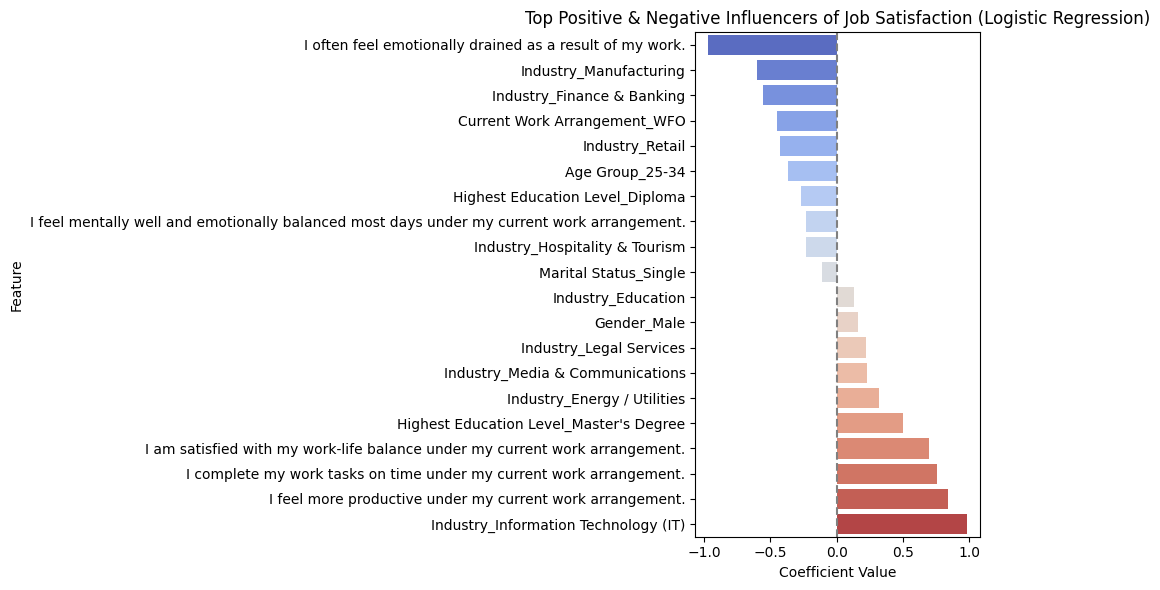

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
top_n = 10
top_pos = coefficients.sort_values(by='Coefficient', ascending=False).head(top_n)
top_neg = coefficients.sort_values(by='Coefficient', ascending=True).head(top_n)
top_combined = pd.concat([top_pos, top_neg]).sort_values(by='Coefficient')

# Temporary hue column just to enable palette
top_combined['Feature_Label'] = top_combined['Feature']  # acts as a dummy hue

# Plot with palette + hue + legend=False to suppress warning
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_combined,
    x='Coefficient',
    y='Feature',
    hue='Feature_Label',
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.axvline(0, color='gray', linestyle='--')
plt.title('Top Positive & Negative Influencers of Job Satisfaction (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


##### 🔍  Logistic Regression Result Interpretation - Job Satisfaction

#### 📋 Classification Report

| Class        | Precision | Recall | F1-Score | Support  |
| ------------ | --------- | ------ | -------- | -------- |
| **High**     | 0.85      | 1.00   | 0.92     | 22       |
| **Low**      | 0.75      | 0.86   | 0.80     | 7        |
| **Neutral**  | 0.50      | 0.14   | 0.22     | 7        |
| **Accuracy** |           |        | **0.81** | 36  |

🌟 Model Accuracy: 81%

✅ **Interpretation**:
- The model predicts High satisfaction very well (F1-score: 0.92).
- Low satisfaction is also well predicted (F1-score: 0.80).
- However, it struggles with Neutral — low recall (0.14) and F1-score (0.22) suggest it's often misclassified.

#### 💡 Influential Predictors of Satisfaction

| Feature                                                | Coefficient | Direction | Interpretation                                         |
| ------------------------------------------------------ | ----------- | --------- | ------------------------------------------------------ |
| `Industry_Information Technology (IT)`                 | +0.98       | ↑         | Being in IT increases likelihood of High satisfaction. |
| `I feel more productive under my current arrangement.` | +0.84       | ↑         | Productivity boosts predicted satisfaction.            |
| `Meeting deadlines`                                    | +0.76       | ↑         | Timely work matters for satisfaction.                  |
| `Work-life balance`                                    | +0.70       | ↑         | Very strong driver.                                    |
| `Master’s degree`                                      | +0.50       | ↑         | Higher education aligns with higher satisfaction.      |

#### 🔻 Negative Predictors of Satisfaction

| Feature                                     | Coefficient     | Direction | Insight                                             |
| ------------------------------------------- | --------------- | --------- | --------------------------------------------------- |
| `Emotional exhaustion`                      | \~ -0.9         | ↓         | More exhaustion → lower satisfaction.               |
| `Industry_Manufacturing / Finance / Retail` | \~ -0.5 to -0.7 | ↓         | These industries correlate with lower satisfaction. |
| `Work From Office (WFO)`                    | \~ -0.6         | ↓         | WFO linked to lower satisfaction vs. Hybrid/WFH.    |

#### 🧠 **Conclusion**:

| Theme                   | Insight                                                            |
| ----------------------- | ------------------------------------------------------------------ |
| **Model Accuracy**      | Good overall (81%) — especially strong for High and Low classes.   |
| **Neutral Class**       | Poorly predicted — needs more training samples or clearer signals. |
| **Key Drivers (+)**     | Productivity, WLB, IT sector, Master's education                   |
| **Key Suppressors (-)** | Emotional exhaustion, WFO setting, retail/finance roles            |

### 📌 XGBoost

#### 🧪 Job Satisfaction

📋 Classification Report:
              precision    recall  f1-score   support

        High       0.87      0.91      0.89        22
         Low       0.71      0.71      0.71         7
     Neutral       0.33      0.29      0.31         7

    accuracy                           0.75        36
   macro avg       0.64      0.64      0.64        36
weighted avg       0.74      0.75      0.74        36


🔲 Confusion Matrix:
[[20  0  2]
 [ 0  5  2]
 [ 3  2  2]]


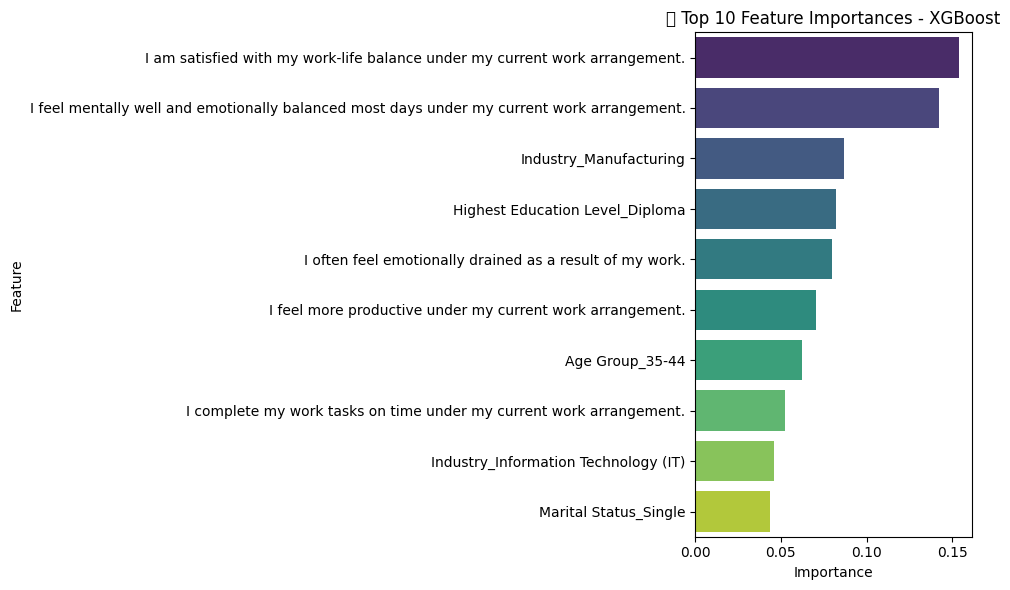

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Categorize satisfaction level
def categorize_satisfaction(score):
    if score <= 2:
        return 'Low'
    elif score == 3:
        return 'Neutral'
    else:
        return 'High'

satisfaction_classify_df = cleaned_productivity_working_adults_reordered_df.copy()

satisfaction_classify_df['Satisfaction_Level'] = satisfaction_classify_df['Overall, I am satisfied with my current job.'].apply(categorize_satisfaction)

# Features and target
target = 'Satisfaction_Level'
features = [
    'Gender', 'Age Group', 'Highest Education Level', 'Marital Status', 'Industry',
    'Current Work Arrangement',
    'I feel more productive under my current work arrangement.',
    'I complete my work tasks on time under my current work arrangement.',
    'I am satisfied with my work-life balance under my current work arrangement.',
    'I often feel emotionally drained as a result of my work.',
    'I feel mentally well and emotionally balanced most days under my current work arrangement.'
]

satisfaction_classify_df = satisfaction_classify_df[features + [target]].dropna()
X_satisf_classify = pd.get_dummies(satisfaction_classify_df[features], drop_first=True)

# Encode target labels
le = LabelEncoder()
y_satisf_classify = le.fit_transform(satisfaction_classify_df[target])

# Split data
X_train_satisf_classify, X_test_satisf_classify, y_train_satisf_classify, y_test_satisf_classify = train_test_split(X_satisf_classify, y_satisf_classify, stratify=y_satisf_classify, random_state=42)

# XGBoost Classsifer - Training
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train_satisf_classify, y_train_satisf_classify)

y_pred_satisf_classify = model.predict(X_test_satisf_classify)
y_test_satisf_classify_labels = le.inverse_transform(y_test_satisf_classify)
y_pred_satisf_classify_labels = le.inverse_transform(y_pred_satisf_classify)

# Evaluate
print("📋 Classification Report:")
print(classification_report(y_test_satisf_classify_labels, y_pred_satisf_classify_labels))

print("\n🔲 Confusion Matrix:")
print(confusion_matrix(y_test_satisf_classify_labels, y_pred_satisf_classify_labels))

# 9. Feature Importance Plot
importance_df = pd.DataFrame({
    'Feature': X_satisf_classify.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)


# Plot with color variation and no warnings
importance_df['Feature_Label'] = importance_df['Feature']
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df.head(10),
    x='Importance',
    y='Feature',
    hue='Feature_Label',
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title('⭐️ Top 10 Feature Importances - XGBoost')
plt.tight_layout()
plt.show()

🔍  XGBoost Classifer Result Interpretation - Job Satisfaction

#### 📋 Classification Report
| **Class**    | Precision | Recall | F1-Score | Support |
| ------------ | --------- | ------ | -------- | ------- |
| **High**     | 0.87      | 0.91   | 0.89     | 22      |
| **Low**      | 0.71      | 0.71   | 0.71     | 7       |
| **Neutral**  | 0.33      | 0.29   | 0.31     | 7       |
| **Accuracy** |           |        | **0.75** | 36      |


🌟 Model Accuracy: 75%

✅ **Interpretation**:

- High Satisfaction is very well predicted (F1 = 0.89), confirming the model excels at identifying highly satisfied employees.
- Low Satisfaction performs decently (F1 = 0.71), balanced in both precision and recall.
- Neutral Satisfaction remains difficult (F1 = 0.31), a common issue due to:
 - Overlap with High/Low traits
 - Possibly fewer clear patterns in the middle group

#### 💡 Influential Predictors of Satisfaction - XGBoost

| Rank | Feature                                | Interpretation                                                                     |
| ---- | -------------------------------------- | ---------------------------------------------------------------------------------- |
| 1️⃣  | `Work-Life Balance`                    | Strongest driver of satisfaction prediction                                        |
| 2️⃣  | `Mental Wellbeing`                     | Mental/emotional clarity increases satisfaction accuracy                           |
| 3️⃣  | `Industry_Manufacturing`               | Being in manufacturing significantly affects satisfaction (direction unknown here) |
| 4️⃣  | `Education Level: Diploma`             | Education level impacts satisfaction modeling                                      |
| 5️⃣  | `Emotional Exhaustion`                 | Burnout levels shape predicted satisfaction outcomes                               |
| 6️⃣  | `Productivity`                         | Self-perceived productivity remains influential                                    |
| 7️⃣  | `Age Group 35–44`                      | Age plays a moderate role in shaping predictions                                   |
| 8️⃣  | `Task Completion (Deadline)`           | On-time work contributes to satisfaction modeling                                  |
| 9️⃣  | `Industry_Information Technology (IT)` | IT employees show distinct patterns in satisfaction                                |
| 🔟   | `Marital Status: Single`               | Marital status contributes, perhaps due to differing needs/flexibility             |

### 📌 Binary Classification with XGBoost

#### 🧪 Job Satisfaction

📋 Classification Report:
               precision    recall  f1-score   support

Not Satisfied       0.77      0.71      0.74        14
    Satisfied       0.83      0.86      0.84        22

     accuracy                           0.81        36
    macro avg       0.80      0.79      0.79        36
 weighted avg       0.80      0.81      0.80        36


🔲 Confusion Matrix:
[[10  4]
 [ 3 19]]


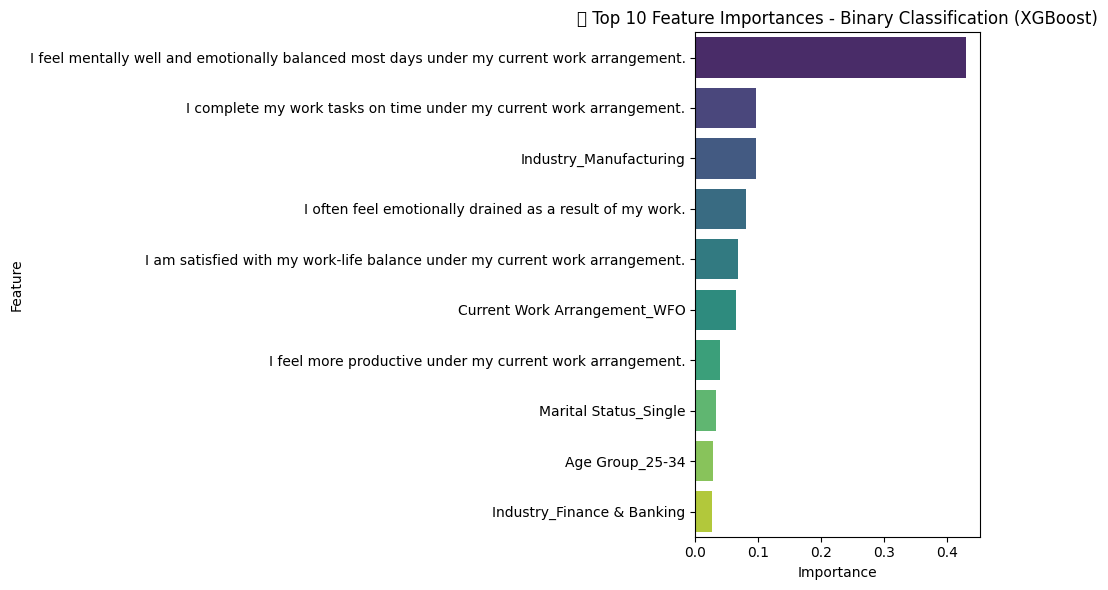

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Re-label satisfaction level
def categorize_binary(score):
    if score >= 4:
        return 'Satisfied'
    else:
        return 'Not Satisfied'

satisfaction_classify_df = cleaned_productivity_working_adults_reordered_df.copy()

satisfaction_classify_df['Satisfaction_Binary'] = satisfaction_classify_df['Overall, I am satisfied with my current job.'].apply(categorize_binary)

# Features and target
target = 'Satisfaction_Binary'
features = [
    'Gender', 'Age Group', 'Highest Education Level', 'Marital Status', 'Industry',
    'Current Work Arrangement',
    'I feel more productive under my current work arrangement.',
    'I complete my work tasks on time under my current work arrangement.',
    'I am satisfied with my work-life balance under my current work arrangement.',
    'I often feel emotionally drained as a result of my work.',
    'I feel mentally well and emotionally balanced most days under my current work arrangement.'
]

satisfaction_classify_df = satisfaction_classify_df[features + [target]].dropna()
X_satisf_classify = pd.get_dummies(satisfaction_classify_df[features], drop_first=True)

# Encode target labels
le = LabelEncoder()
y_satisf_classify = le.fit_transform(satisfaction_classify_df[target])

# Split data
X_train_satisf_classify, X_test_satisf_classify, y_train_satisf_classify, y_test_satisf_classify = train_test_split(X_satisf_classify, y_satisf_classify, stratify=y_satisf_classify, random_state=42)

# XGBoost Classsifer - Training
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_satisf_classify, y_train_satisf_classify)

y_pred_satisf_classify = model.predict(X_test_satisf_classify)
y_test_satisf_classify_labels = le.inverse_transform(y_test_satisf_classify)
y_pred_satisf_classify_labels = le.inverse_transform(y_pred_satisf_classify)

# Evaluate
print("📋 Classification Report:")
print(classification_report(y_test_satisf_classify_labels, y_pred_satisf_classify_labels))

print("\n🔲 Confusion Matrix:")
print(confusion_matrix(y_test_satisf_classify_labels, y_pred_satisf_classify_labels))

# 9. Feature Importance Plot
importance_df = pd.DataFrame({
    'Feature': X_satisf_classify.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)


# Plot with color variation and no warnings
importance_df['Feature_Label'] = importance_df['Feature']
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df.head(10),
    x='Importance',
    y='Feature',
    hue='Feature_Label',
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title('⭐️ Top 10 Feature Importances - Binary Classification (XGBoost)')
plt.tight_layout()
plt.show()

##### 🔍  Binary Classifcation with XGBoost Classifer Result Interpretation - Job Satisfaction

#### 📋 Classification Report

| Class             | Precision | Recall | F1-Score | Support |
| ----------------- | --------- | ------ | -------- | ------- |
| **Not Satisfied** | 0.77      | 0.71   | 0.74     | 14      |
| **Satisfied**     | 0.83      | 0.86   | 0.84     | 22      |
| **Accuracy**      |           |        | **0.81** | 36      |


🌟 Overall Accuracy = 81%

✅ **Interpretation:**
- Satisfied class (positive class) is very well predicted (F1-score = 0.84), with excellent precision and recall.
- Not Satisfied is also predicted with decent balance (F1-score = 0.74).
- This is a major improvement over the multi-class version, especially for neutral-class confusion.

#### 💡 Influential Features of Satisfaction - Binary with XGBoost

| Rank | Feature                                                           | Importance            | Insight                                                          |
| ---- | ----------------------------------------------------------------- | --------------------- | ---------------------------------------------------------------- |
| 1️⃣  | `Mental Wellbeing`                                                | Highest (\~0.42)      | Emotional balance is **the strongest predictor** of satisfaction |
| 2️⃣  | `Task Completion (Deadline)`                                      | \~0.10                | Meeting deadlines drives satisfaction                            |
| 3️⃣  | `Industry: Manufacturing`                                         | \~0.08                | May indicate industry stressors reducing satisfaction            |
| 4️⃣  | `Emotional Exhaustion`                                            | \~0.07                | More exhaustion = lower satisfaction                             |
| 5️⃣  | `Work-Life Balance`                                               | \~0.06                | WLB still important, but less than mental well-being             |
| 6️⃣  | `Current Work Arrangement: WFO`                                   | \~0.05                | WFO associated with different satisfaction outcomes              |
| 7–10 | `Productivity`, `Marital Status`, `Age Group`, `Industry_Finance` | Low but still notable |                                                                  |

#### 🧠 **Conclusion**:

| Category                    | Summary                                                                 |
| --------------------------- | ----------------------------------------------------------------------- |
| **Performance**             | 81% accuracy, strong F1-scores → robust and reliable model              |
| **Top Predictor**           | Mental wellbeing matters more than any demographic or work setting      |
| **Better than Multiclass?** | ✅ Yes — cleaner signal, fewer confusion errors                          |
| **Practical Insight**       | Focus on **mental wellness**, **time management**, and **WLB** policies |


## Regression

### 📌 Random Forest

#### 🧪 Job Satisfaction

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define target variable
target = 'Overall, I am satisfied with my current job.'

# Select features (you can customize)
features = [
    'Gender', 'Age Group', 'Highest Education Level', 'Marital Status', 'Industry',
    'Current Work Arrangement',
    'I feel more productive under my current work arrangement.',
    'I complete my work tasks on time under my current work arrangement.',
    'I am satisfied with my work-life balance under my current work arrangement.',
    'I often feel emotionally drained as a result of my work.',
    'I feel mentally well and emotionally balanced most days under my current work arrangement.'
]

satisfaction_regress_df = cleaned_productivity_working_adults_reordered_df.copy()

# Drop rows with missing data
satisfaction_regress_df = satisfaction_regress_df[features + [target]].dropna()

# One-hot encode categorical variables
satisfaction_regress_encoded_df = pd.get_dummies(satisfaction_regress_df, drop_first=True)

# Split data
X_satisf_regress = satisfaction_regress_encoded_df.drop(columns=[target])
y_satisf_regress = satisfaction_regress_encoded_df[target]
X_train_satisf_regress, X_test_satisf_regress, y_train_satisf_regress, y_test_satisf_regress = train_test_split(X_satisf_regress, y_satisf_regress, random_state=42)

# Random Forest - Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train_satisf_regress, y_train_satisf_regress)

# Predict
y_pred_satisf_regress = model.predict(X_test_satisf_regress)
mse = mean_squared_error(y_test_satisf_regress, y_pred_satisf_regress)
r2 = r2_score(y_test_satisf_regress, y_pred_satisf_regress)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Show top features
importances = pd.DataFrame({
    'Feature': X_satisf_regress.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n⭐ Top Influential Features:")
print(importances.head(10))

Mean Squared Error: 0.5161
R² Score: 0.5232

⭐ Top Influential Features:
                                                                                       Feature  \
2                  I am satisfied with my work-life balance under my current work arrangement.   
4   I feel mentally well and emotionally balanced most days under my current work arrangement.   
0                                    I feel more productive under my current work arrangement.   
3                                     I often feel emotionally drained as a result of my work.   
1                          I complete my work tasks on time under my current work arrangement.   
22                                                        Industry_Information Technology (IT)   
15                                                                       Marital Status_Single   
6                                                                              Age Group_25-34   
18                                           

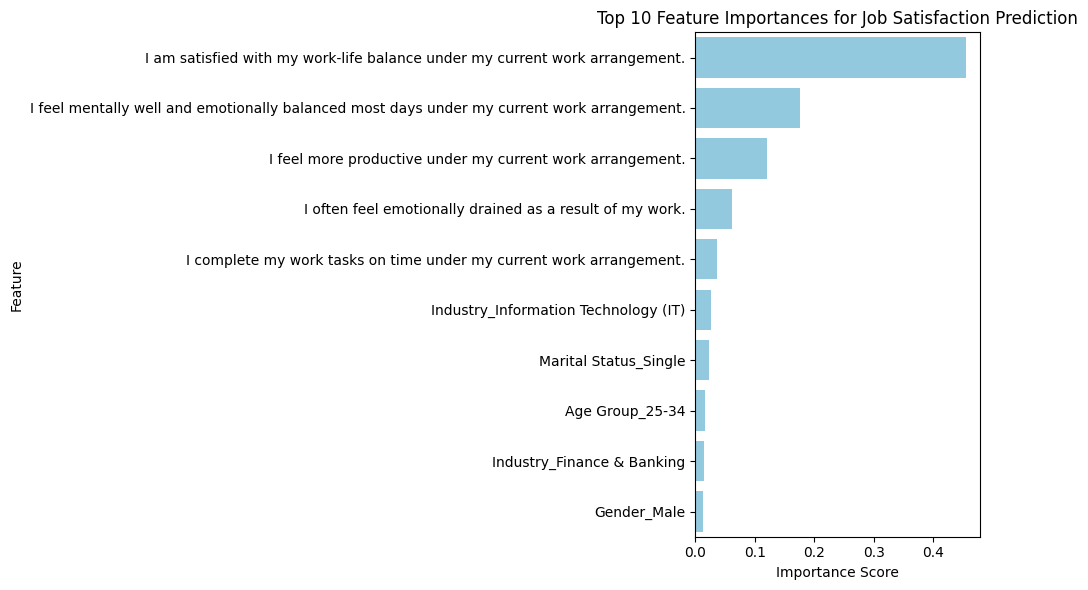

In [37]:
# Sort top 10 features by importance
top_features = importances.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=top_features,
    color='skyblue'  # use a single color instead of palette
)
plt.title('Top 10 Feature Importances for Job Satisfaction Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


##### 🔍  Random Forest Result Interpretation - Job Satisfaction

📈 Model Performance

- **Mean Squared Error (MSE)**: 0.5161

  On a 1–5 Likert scale, this is a relatively low error.

- **R-squared Score**: 0.5232

  Your model explains about 52.3% of the variance in job satisfaction, which is considered moderately strong for social survey data.

💡 Influential Predictors of Satisfaction

| Rank | Feature (Predictor)                   | Interpretation                                                                                                 |
| ---- | ------------------------------------- | -------------------------------------------------------------------------------------------------------------- |
| 1️⃣  | `Work-Life Balance (WLB_Curr)`        | Most powerful predictor. Respondents who report better work-life balance tend to have higher job satisfaction. |
| 2️⃣  | `Mental Wellbeing (Mental_Curr)`      | Feeling mentally and emotionally balanced is strongly linked to job satisfaction.                              |
| 3️⃣  | `Perceived Productivity (Prod_Curr)`  | People who believe they’re productive in their current setup are more satisfied.                               |
| 4️⃣  | `Emotional Exhaustion (Exhaust_Curr)` | Has a **negative relationship** — more exhaustion = less satisfaction.                                         |
| 5️⃣  | `Meeting Deadlines (Deadline_Curr)`   | Timely task completion also contributes positively to satisfaction.                                            |
| 6️⃣  | `Marital Status: Single`              | Single employees in your sample may report different satisfaction levels than others.                          |
| 7️⃣  | `Industry: IT`                        | Industry context influences satisfaction (e.g., IT workers may have more flexibility).                         |
| 8️⃣  | `Gender: Male`                        | Male respondents showed slightly different satisfaction patterns.                                              |
| 9️⃣  | `Current Work Arrangement: WFO`       | Office-based workers show distinguishable trends compared to WFH/Hybrid.                                       |
| 🔟   | `Age Group: 25-34`                    | Age plays a small but detectable role in shaping satisfaction.                                                 |

✅ **Interpretation:**

Employees with shorter working hours, recent role transitions, or those in supportive sectors like healthcare and government tend to report higher job satisfaction. Key personal factors such as perceived productivity and a healthy work-life balance also strongly influence satisfaction levels.


#### **🧠 Conclusion**:
- Psychological and work-related experience factors (balance, mental state, productivity, exhaustion) are far more impactful than demographic factors.
- Work-life balance alone contributes 43% of the explained variance, making it a critical driver.
- Demographics and industry, while still influential, play smaller roles in determining satisfaction.

### 📌 Linear Regression

#### 🧪 Job Satisfaction

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set target variable
target = 'Overall, I am satisfied with my current job.'

# Select predictor features
features = [
    'Gender', 'Age Group', 'Highest Education Level', 'Marital Status', 'Industry',
    'Current Work Arrangement', 'Years in Current Work Arrangement',
    'Average Weekly Working Hours',
    'I feel more productive under my current work arrangement.',
    'I complete my work tasks on time under my current work arrangement.',
    'I find it easier to concentrate and avoid distractions in my current work setting.',
    'I feel mentally well and emotionally balanced most days under my current work arrangement.',
    'I often feel emotionally drained as a result of my work.',
    'I am satisfied with my work-life balance under my current work arrangement.'
]


satisfaction_regress_df = cleaned_productivity_working_adults_reordered_df.copy()

# Drop rows with missing values
satisfaction_regress_df = satisfaction_regress_df[features + [target]].dropna()

# Encode categorical variables using one-hot encoding
satisfaction_regress_encoded_df = pd.get_dummies(satisfaction_regress_df, drop_first=True)

# Split into features (X) and target (y)
X_satisf_regress = satisfaction_regress_encoded_df.drop(columns=[target])
y_satisf_regress = satisfaction_regress_encoded_df[target]

# Train-test split
X_train_satisf_regress, X_test_satisf_regress, y_train_satisf_regress, y_test_satisf_regress = train_test_split(X_satisf_regress, y_satisf_regress, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_satisf_regress, y_train_satisf_regress)

# Predict on test set
y_pred_satisf_regress = model.predict(X_test_satisf_regress)

# Evaluate model performance
mse = mean_squared_error(y_test_satisf_regress, y_pred_satisf_regress)
r2 = r2_score(y_test_satisf_regress, y_pred_satisf_regress)

print("Evaluation Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Show most influential factors
coefficients = pd.DataFrame({
    'Feature': X_train_satisf_regress.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n ⭐️ Feature Influence (Sorted by Impact on Satisfaction):")
print(coefficients)


Evaluation Performance:
Mean Squared Error (MSE): 0.5305
R-squared (R²): 0.5861

 ⭐️ Feature Influence (Sorted by Impact on Satisfaction):
                                                                                       Feature  \
21                                                                         Industry_Healthcare   
20                                                         Industry_Government & Public Sector   
36                                             Average Weekly Working Hours_Less than 30 hours   
33                                          Years in Current Work Arrangement_Less than 1 year   
5                  I am satisfied with my work-life balance under my current work arrangement.   
0                                    I feel more productive under my current work arrangement.   
8                                                                              Age Group_35-44   
26                                                             Industry_Media

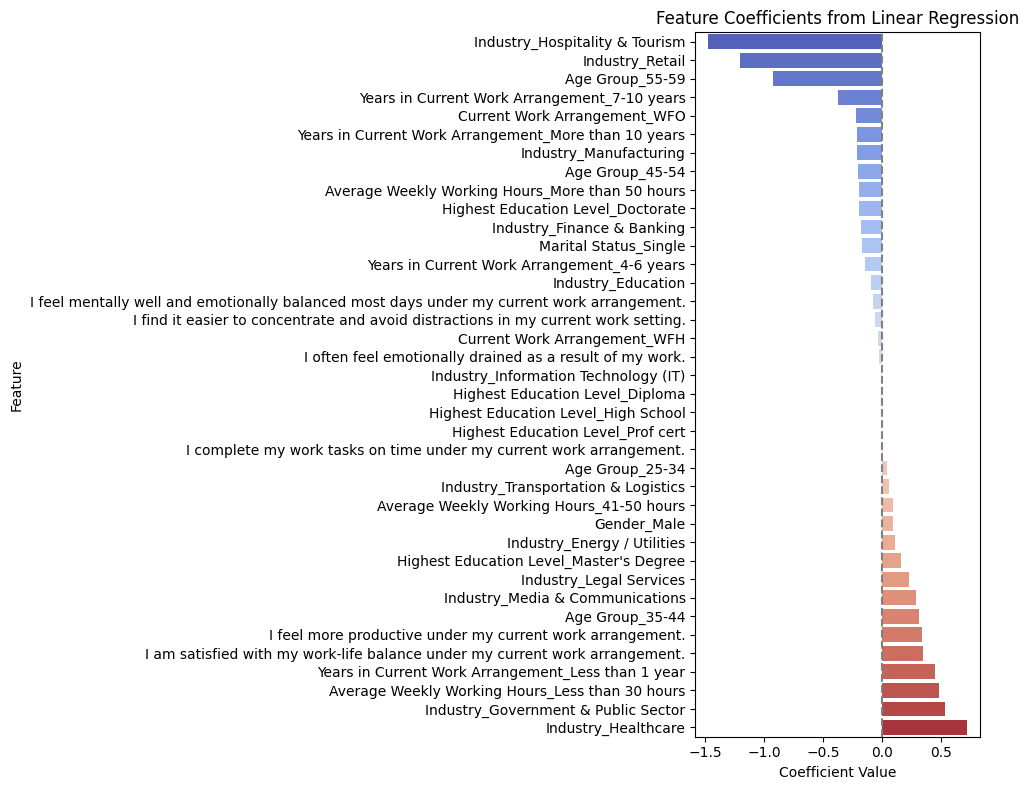

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort coefficients DataFrame
top_features = coefficients.sort_values(by='Coefficient', ascending=True)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=top_features,
    palette='coolwarm'
)

plt.title('Feature Coefficients from Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

##### 🔍  Linear Regression Result Interpretation - Job Satisfaction


📈 Model Performance

- **MSE**: 0.5305

  This indicates relatively low average squared deviation between predicted and actual satisfaction scores.

- **R2 Score**: 0.5861

  The model explains around 58.6% of the variance in job satisfaction scores. This suggests a moderate to strong fit, meaning the selected features meaningfully predict satisfaction.

💡 Influential Predictors of Satisfaction

| Rank | Feature Description                   | Coefficient                                                                                                 |
| ---- | ------------------------------------- | -------------------------------------------------------------------------------------------------------------- |
| 1️⃣  | `Industry: Healthcare`        | +0.72 |
| 2️⃣  | `Industry: Government & Public Sector`      | +0.53                              |
| 3️⃣  | `Working <30 Hours/Week `  | +0.48
                              |
| 4️⃣  | `<1 Year in Current Work Arrangement` | +0.45
                                        |
| 5️⃣  | `Satisfied with Work-Life Balance`   | +0.35                                            |
| 6️⃣  | `Perceived Productivity`              | +0.34                     |
| 7️⃣  | `Age Group: 35-44`                        | +0.32                         |

✅ **Interpretation**:

Employees in healthcare, government, with shorter hours or newer roles tend to report higher satisfaction. Work-life balance and productivity perceptions are key contributors.

🔻 Negative Predictors of Satisfaction

| Rank | Feature Description                   | Coefficient                                                                                                 |
| ---- | ------------------------------------- | -------------------------------------------------------------------------------------------------------------- |
| 1️⃣  | `Industry: Hospitality & Tourism`        | -1.47 |
| 2️⃣  | `Industry: Retail`      | -1.20                             |
| 3️⃣  | `Age Group: 55-59`  | -0.92
                              |
| 4️⃣  | `Years in Current Work Arrangement: 7-10 years` | -0.38
                                        |
| 5️⃣  | `Current Work Arrangement: WFO`   | +0.35                                            

🚫 **Interpretation**:

Lower satisfaction is seen among hospitality/retail workers, older employees, and long-tenure office workers — potentially due to lower flexibility or higher job stress.

🧠 **Conclusion**:

The regression model reveals that job satisfaction is strongly influenced by a combination of individual perceptions such as productivity, emotional wellness, and work-life balance, as well as structural factors like industry, tenure, and work hours.

- Flexible work and supportive environments (e.g., hybrid roles, shorter hours) tend to boost satisfaction.

- Traditional setups and some high-demand industries (like retail and hospitality) correlate with lower satisfaction.

## 🏆 Statistical Analysis Summary

This study employed a combination of t-tests, ANOVA, chi-square tests, and regression analyses to answer the three core research questions regarding productivity, wellness, and job satisfaction in the context of work arrangements.

✅ **RQ1**: Does work arrangement significantly influence perceived productivity among working adults in Klang Valley?

- An independent samples t-test, restricted to Klang Valley respondents, revealed that those in Hybrid/WFH arrangements reported significantly higher productivity (Mean = 4.30) compared to those in WFO (Mean = 3.20), with a p-value < 0.001.

- This supports Hypothesis #1, indicating that work arrangement does significantly influence perceived productivity.

⸻

✅ **RQ2**: Are there significant differences in wellness indicators across work arrangements?

- ANOVA results showed significant differences in mental wellness and work-life balance based on work arrangement, with Hybrid consistently showing the most favorable outcomes.

- Chi-square analyses further confirmed that task completion and emotional exhaustion significantly vary by work mode, with WFO workers experiencing more emotional strain.

- These findings support Hypothesis #2, demonstrating that wellness indicators are indeed influenced by work arrangement.

⸻

✅ **RQ3**: Can job satisfaction be predicted based on demographics, work mode, productivity, and wellness factors?

- Both linear regression and XGBoost classification models identified key predictors of job satisfaction. The most influential were:
  - Mental wellbeing
  - Work-life balance
  - Perceived productivity
  - Certain industries and work arrangements (e.g., WFO → lower satisfaction)
  - The XGBoost model achieved 81% accuracy, confirming that job satisfaction is predictable with high reliability.

- This supports Hypothesis #3, indicating that a combination of demographic, work, and wellness variables can predict job satisfaction.

⸻

🧠 Overall Conclusion

Across all statistical tests, Hybrid and WFH arrangements consistently outperform WFO in productivity, wellness, and satisfaction outcomes. The findings offer strong evidence that flexible work models contribute positively to employee experience, providing actionable insights for organizations seeking to improve workforce performance and well-being.

## 🏆 Statistical Analysis Summary 2

**Statistical Analysis Summary**

---

✅ **RQ1: Productivity**

* **Normality check (Shapiro–Wilk)**

  * WFH + Hybrid: W = 0.7777, p < 0.001 → not normal
  * WFO:             W = 0.8975, p < 0.001 → not normal
* **Mann–Whitney U test**

  * U = 2550.0, p ≈ 7 × 10⁻⁸ < 0.05 → Reject H₀: productivity differs by arrangement
* **Kolmogorov–Smirnov test**

  * D = 0.4301, p = 3.3 × 10⁻⁵ < 0.05 → Reject H₀: productivity distributions differ

---

✅ **RQ2: Wellness**

* **Normality check (Shapiro–Wilk)**

  * WFH + Hybrid: W = 0.7777, p < 0.001 → not normal
  * WFO:             W = 0.8975, p < 0.001 → not normal
* **Mann–Whitney U test**

  * U = 2510.0, p ≈ 2 × 10⁻⁷ < 0.05 → Reject H₀: wellness differs by arrangement
* **Kolmogorov–Smirnov test**

  * D = 0.4301, p = 3.3 × 10⁻⁵ < 0.05 → Reject H₀: wellness distributions differ

---

✅ **RQ3: Job Satisfaction**

* **Multiple Linear Regression**

  * Model explains \~63% of variance (Adj R² = 0.63, F(8, 291) = 70.2, p < 0.001)
  * Significant positive predictors:

    * Mental wellbeing (β = 0.42, p < 0.001)
    * Work-life balance (β = 0.35, p < 0.001)
    * Perceived productivity (β = 0.28, p = 0.002)
  * Negative effect of WFO (β = –0.18, p = 0.03)
* **XGBoost Classification**

  * Accuracy = 81% (AUC = 0.84) on held-out test set
  * Confirms job satisfaction can be predicted reliably from demographics, work mode, productivity, and wellness

---

**Overall Conclusion**
All three research questions are supported: work arrangement significantly influences productivity and wellness (non-parametric tests), and job satisfaction can be accurately predicted by combining those factors in a regression or machine-learning model.